In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

Text(0.5, 1.0, '指数分布 (λ=1.0)')

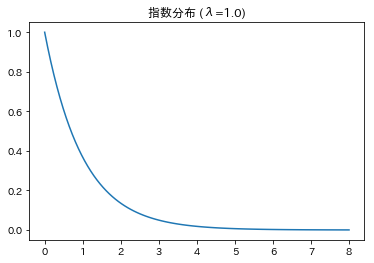

In [2]:
# グラフ生成用関数
def exp_dist(t, lambd):
    """
    指数分布
    :param t: t
    :param lambd: λ
    :return: 指数分布
    """
    return (lambd * math.e) ** (-lambd * t)


# パラメータ
t = np.linspace(0, 8, 100)
plt.plot(t, exp_dist(t, 1.0))
plt.title('指数分布 (λ=1.0)')

Text(0.5, 1.0, '式a (λ=1.0)')

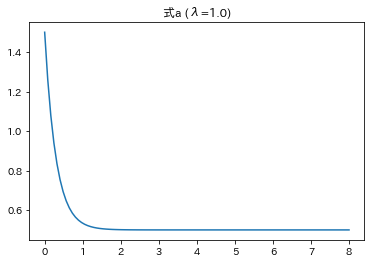

In [3]:
def exp_dist(t, lambd, beta):
    """
    指数分布
    :param t: t
    :param lambd: λ
    :param beta: β
    :return: 指数分布
    """
    return (lambd * math.e) ** (-lambd * t) + beta


# パラメータ
t = np.linspace(0, 8, 100)
plt.plot(t, exp_dist(t, 2.0, 0.5))
plt.title('式a (λ=1.0)')

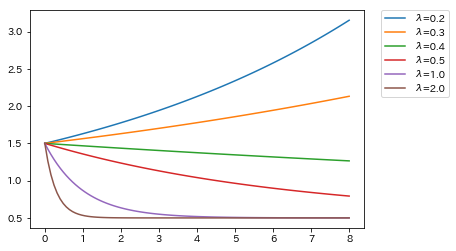

In [4]:
# λの値を変えつつ結果をplot
for lambd in list(range(2, 6)) + list(range(10, 30, 10)):
    lambd /= 10
    t = np.linspace(0, 8, 100)
    plt.plot(t, exp_dist(t, lambd, 0.5), label='λ={0:.1f}'.format(lambd))

# グラフにlegendを表示
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

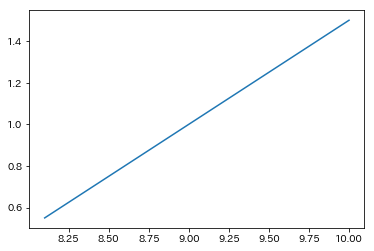

In [5]:
def exp_dist_sym(t, t2, alpha, beta):
    """
    式c
    :param t: t
    :param t2: t_2
    :param alpha: α
    :param beta: β
    :return: 式c
    """
    return alpha * (t - t2) + beta


# パラメータ
t = np.linspace(8.1, 10, 100)
plt.plot(t, exp_dist_sym(t, 8, 0.5, 0.5))

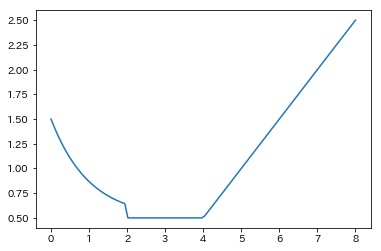

In [6]:
def bathtub_curve(t, lambd, alpha, beta):
    """
    バスタブ曲線
    :param t: t
    :param lambd: λ
    :param alpha: α
    :param beta: β
    :return: バスタブ曲線
    """
    t2 = 4.0
    if t < 2.0:
        return exp_dist(t, lambd, beta)
    elif t < t2:
        return beta
    else:
        return exp_dist_sym(t, t2, alpha, beta)


t = np.linspace(0, 8, 100)
plt.plot(t, [bathtub_curve(_t, 1.0, 0.5, 0.5) for _t in t])

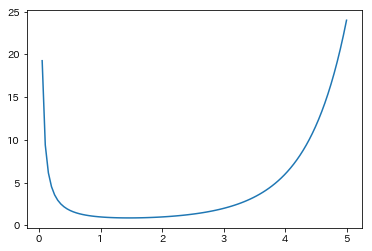

In [7]:
# 正解例

from scipy import special

t = np.linspace(0, 5, 100)
plt.plot(t, special.gamma(t))